<a href="https://colab.research.google.com/github/fox2056/data-science-bootcamp/blob/main/deep_learning_ts_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/multivariate_ts.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')

In [4]:
class LogTransformation:

  @staticmethod
  def transform(x):
    xt = np.sign(x) * np.log(np.abs(x) + 1)
    return xt

  @staticmethod
  def inverse_transform(xt):
    x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)
    return x

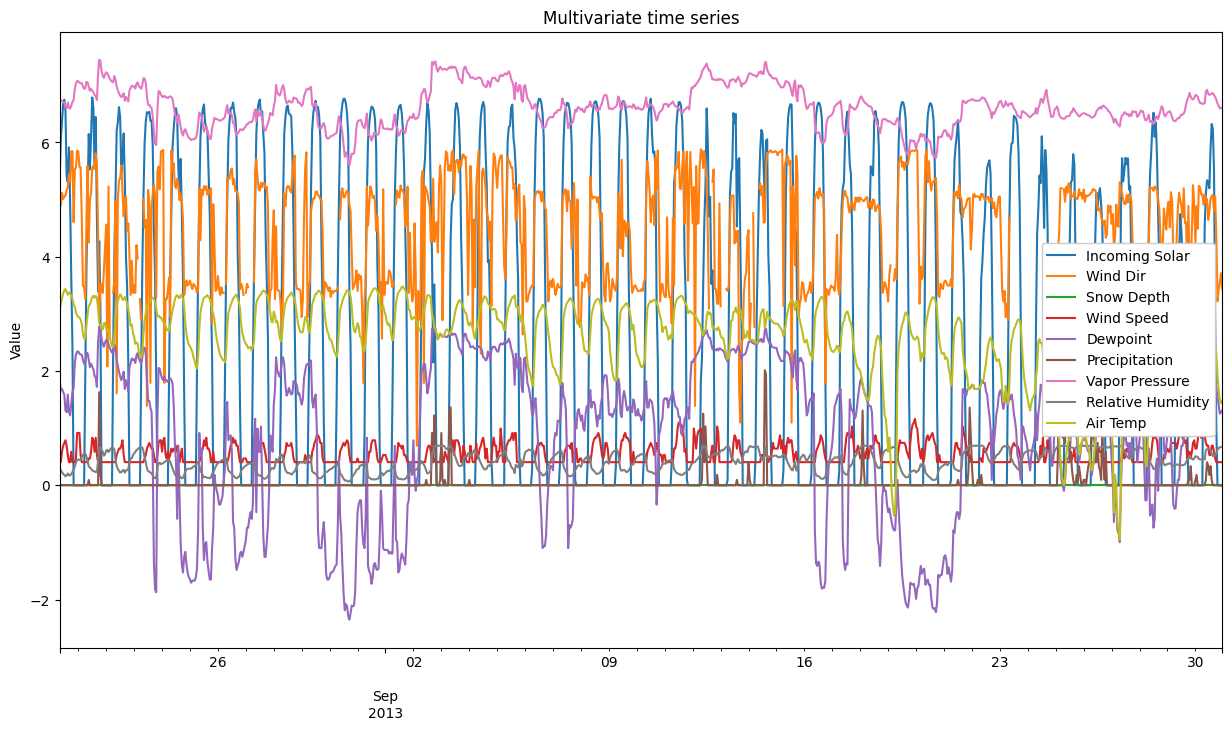

In [6]:
data_log = LogTransformation.transform(data)

sample = data_log.tail(1000)

mv_plot = sample.plot(figsize=(15, 8),
                      title='Multivariate time series',
xlabel='',
ylabel='Value')
mv_plot.legend(fancybox=True, framealpha=1)

In [8]:
stat_by_variable = {
  'Incoming Solar': 'sum',
  'Wind Dir': 'mean',
  'Snow Depth': 'sum',
  'Wind Speed': 'mean',
  'Dewpoint': 'mean',
  'Precipitation': 'sum',
  'Vapor Pressure': 'mean',
  'Relative Humidity': 'mean',
  'Air Temp': 'max',
}
data_daily = data.resample('D').agg(stat_by_variable)

In [9]:
corr_matrix = data_daily.corr(method='pearson')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Incoming Solar'),
  Text(1.5, 0, 'Wind Dir'),
  Text(2.5, 0, 'Snow Depth'),
  Text(3.5, 0, 'Wind Speed'),
  Text(4.5, 0, 'Dewpoint'),
  Text(5.5, 0, 'Precipitation'),
  Text(6.5, 0, 'Vapor Pressure'),
  Text(7.5, 0, 'Relative Humidity'),
  Text(8.5, 0, 'Air Temp')])

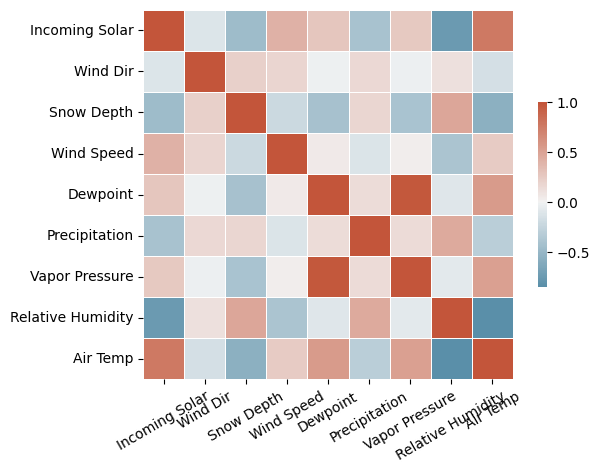

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=corr_matrix,
            cmap=sns.diverging_palette(230, 20, as_cmap=True),
            xticklabels=data_daily.columns,
            yticklabels=data_daily.columns,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.xticks(rotation=30)